## Predicting Bank Churn Rate

#### Import Libraries

In [1]:
import numpy as np
import pandas as pd
from sklearn import preprocessing
from sklearn.model_selection import train_test_split
import seaborn as sns
sns.set(style="white")
sns.set(style="whitegrid", color_codes=True)
import matplotlib.pyplot as plt 
plt.rc("font", size=14)
from tensorflow.keras import Sequential
from tensorflow.keras.layers import Dense

#### Read Input data

In [2]:
data = pd.read_csv('bank.csv', header=0)

In [3]:
data.head()

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,2,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,3,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,4,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,5,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


#### Perform Univariate Analysis

In [4]:
# Convert Gender to a numeric column with Female=0, Male=1

In [5]:
data.Gender.replace(['Male', 'Female'], [1, 0], inplace=True)

In [6]:
# Let us perform Univariate analysis on the data

In [7]:
data.shape

(10000, 14)

In [8]:
# There are 10,000 rows and 14 columns in the input data

In [9]:
data.dtypes

RowNumber            int64
CustomerId           int64
Surname             object
CreditScore          int64
Geography           object
Gender               int64
Age                  int64
Tenure               int64
Balance            float64
NumOfProducts        int64
HasCrCard            int64
IsActiveMember       int64
EstimatedSalary    float64
Exited               int64
dtype: object

In [10]:
# We have a mix of data types - int64, objects and float64. The data types will need to be modified to ensure all columns have the same
# data type. 

In [11]:
# Check if there are any null values in the input data

In [12]:
data.isnull().sum().sum()

0

In [13]:
# there are no null values in the input data

In [14]:
data.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
RowNumber,10000.0,5.000500e+03,2886.895680,1.00,2500.75,5.000500e+03,7.500250e+03,10000.00
CustomerId,10000.0,1.569094e+07,71936.186123,15565701.00,15628528.25,1.569074e+07,1.575323e+07,15815690.00
CreditScore,10000.0,6.505288e+02,96.653299,350.00,584.00,6.520000e+02,7.180000e+02,850.00
Gender,10000.0,5.457000e-01,0.497932,0.00,0.00,1.000000e+00,1.000000e+00,1.00
Age,10000.0,3.892180e+01,10.487806,18.00,32.00,3.700000e+01,4.400000e+01,92.00
Tenure,10000.0,5.012800e+00,2.892174,0.00,3.00,5.000000e+00,7.000000e+00,10.00
Balance,10000.0,7.648589e+04,62397.405202,0.00,0.00,9.719854e+04,1.276442e+05,250898.09
NumOfProducts,10000.0,1.530200e+00,0.581654,1.00,1.00,1.000000e+00,2.000000e+00,4.00
HasCrCard,10000.0,7.055000e-01,0.455840,0.00,0.00,1.000000e+00,1.000000e+00,1.00
IsActiveMember,10000.0,5.151000e-01,0.499797,0.00,0.00,1.000000e+00,1.000000e+00,1.00


In [15]:
# There are no missing values in the data

In [16]:
# Let's review the distribution of credit score

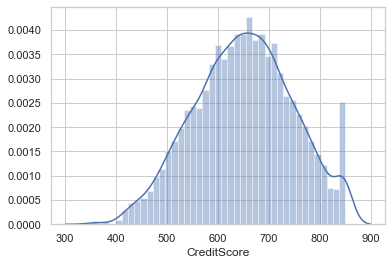

In [17]:
sns.distplot(data['CreditScore'])
plt.show()

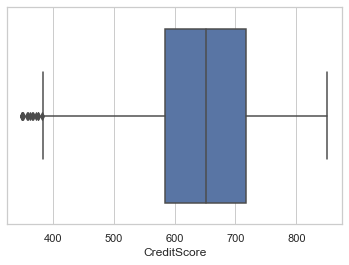

In [18]:
sns.set(style="whitegrid")
ax = sns.boxplot(x=data["CreditScore"])

In [19]:
# Let's understand the distribution of customers across geographies

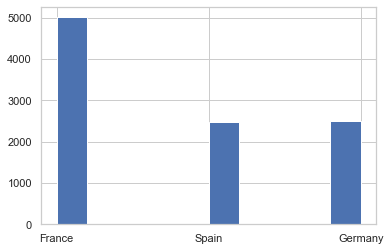

In [20]:
data['Geography'].hist()

In [21]:
# The bank's customers are in France, Spain and Germany. Approx. 50% of the customer base is in France.
# About 25% in Germany and the other 25% in Spain. 

In [22]:
data['Geography'].value_counts()

France     5014
Germany    2509
Spain      2477
Name: Geography, dtype: int64

In [23]:
# Let's look at the gender distribution of bank's customers

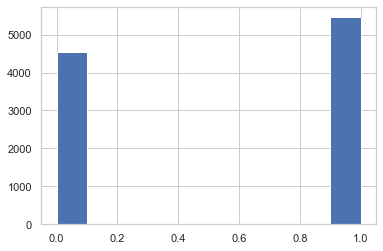

In [24]:
data['Gender'].hist()

In [25]:
data['Gender'].value_counts()

1    5457
0    4543
Name: Gender, dtype: int64

In [26]:
# Bank has more male customers than females. About 54% of the customers are men while 45% are women.

In [27]:
# Let's look at the age distribution of bank's customers

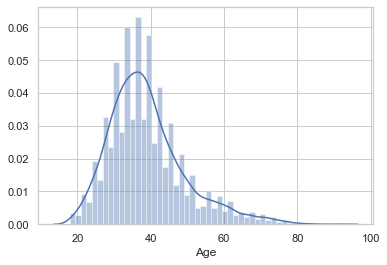

In [28]:
sns.distplot(data['Age'])
plt.show()

In [29]:
# The bank's customer's age ranges from 18 years to 92 years with the median age being 37 years.

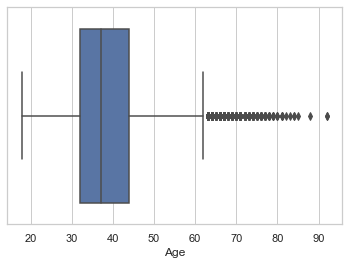

In [30]:
sns.set(style="whitegrid")
ax = sns.boxplot(x=data["Age"])

In [31]:
# Largely the customers above the age of 62 are outliers.

In [32]:
# Let's look at the tenure of the bank customers

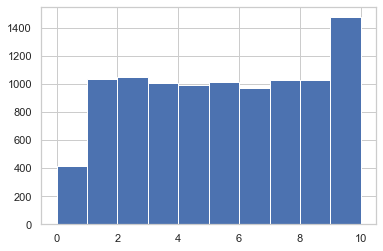

In [33]:
data['Tenure'].hist()

In [34]:
# The bank has had customers as new as 0 to 1 year old and others that are as old as 10 years.
# A large segment of customers have been with the bank for 10 years 

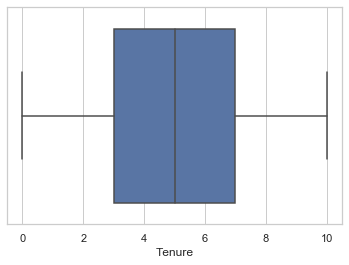

In [35]:
sns.set(style="whitegrid")
ax = sns.boxplot(x=data["Tenure"])

In [36]:
# Let's look at the distribution of customer's account balance

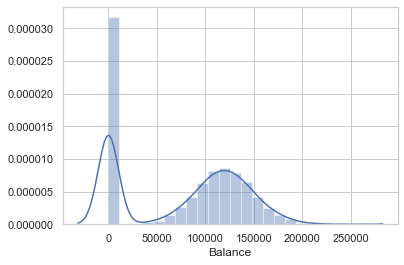

In [37]:
sns.distplot(data['Balance'])
plt.show()

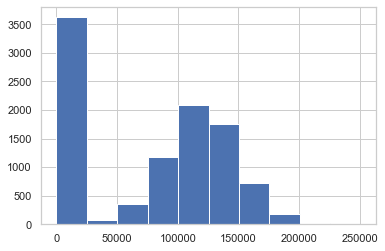

In [38]:
data['Balance'].hist()

In [39]:
# There appear to be a distinct class of customers with under 50000 balance. The remaining population is normally distributed.

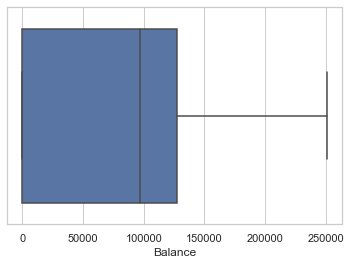

In [40]:
sns.set(style="whitegrid")
ax = sns.boxplot(x=data["Balance"])

In [41]:
# Let's look at the number of products that the customers are holding

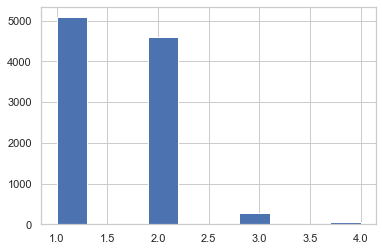

In [42]:
data['NumOfProducts'].hist()

In [43]:
# Most customers hold 1 or 2 products with a small number of customers holding 3 products. 

In [44]:
# Let's look at the segment of customers that have a credit card.

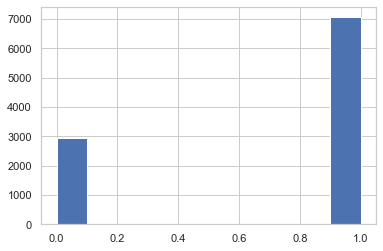

In [45]:
data['HasCrCard'].hist()

In [46]:
# A large proportion of the customers have a credit card from the bank. 70% have a credit card while 30% do not have a credit card.

In [47]:
# Let's look at the proportion of bank's customers that are active

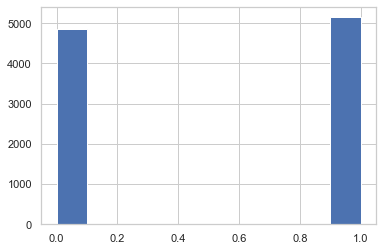

In [48]:
data['IsActiveMember'].hist()

In [49]:
# Appproximately, 52% of the customers are active members while 48% are not active. Inactive members pose a risk of churn

In [50]:
# Let's look at the estimated salary of the customers

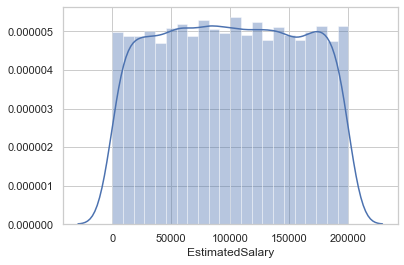

In [51]:
sns.distplot(data['EstimatedSalary'])
plt.show()

In [52]:
# The salary of the customers is distributed uniformally with equal number of customers within 0-50K, 50K-100K, 100K-150K and 150K-200K salary segments

In [53]:
# Now, let's convert the categorical variables to numeric values.

In [54]:
data = pd.get_dummies(data=data, columns=['Geography'])

In [55]:
data.head()

,RowNumber,CustomerId,Surname,CreditScore,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited,Geography_France,Geography_Germany,Geography_Spain
0,1,15634602,Hargrave,619,0,42,2,0.00,1,1,1,101348.88,1,1,0,0
1,2,15647311,Hill,608,0,41,1,83807.86,1,0,1,112542.58,0,0,0,1
2,3,15619304,Onio,502,0,42,8,159660.80,3,1,0,113931.57,1,1,0,0
3,4,15701354,Boni,699,0,39,1,0.00,2,0,0,93826.63,0,1,0,0
4,5,15737888,Mitchell,850,0,43,2,125510.82,1,1,1,79084.10,0,0,0,1


In [56]:
data.shape

(10000, 16)

In [57]:
data.columns

Index(['RowNumber', 'CustomerId', 'Surname', 'CreditScore', 'Gender', 'Age',
       'Tenure', 'Balance', 'NumOfProducts', 'HasCrCard', 'IsActiveMember',
       'EstimatedSalary', 'Exited', 'Geography_France', 'Geography_Germany',
       'Geography_Spain'],
      dtype='object')

#### Let's perform multi-variate analysis

In [58]:
# Let's review the correlation between columns. We will create a new dataframe with columns that we want to see correlation on

In [59]:
data_corr = data[['CreditScore', 'Age', 'Tenure','Balance', 'NumOfProducts','HasCrCard','IsActiveMember', 'EstimatedSalary', 'Exited', 'Geography_France', 'Geography_Spain','Geography_Germany','Gender']].copy()

In [60]:
data_corr.head()

,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited,Geography_France,Geography_Spain,Geography_Germany,Gender
0,619,42,2,0.00,1,1,1,101348.88,1,1,0,0,0
1,608,41,1,83807.86,1,0,1,112542.58,0,0,1,0,0
2,502,42,8,159660.80,3,1,0,113931.57,1,1,0,0,0
3,699,39,1,0.00,2,0,0,93826.63,0,1,0,0,0
4,850,43,2,125510.82,1,1,1,79084.10,0,0,1,0,0


In [61]:
data_corr.corr()

,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited,Geography_France,Geography_Spain,Geography_Germany,Gender
CreditScore,1.000000,-0.003965,0.000842,0.006268,0.012238,-0.005458,0.025651,-0.001384,-0.027094,-0.008928,0.004780,0.005538,-0.002857
Age,-0.003965,1.000000,-0.009997,0.028308,-0.030680,-0.011721,0.085472,-0.007201,0.285323,-0.039208,-0.001685,0.046897,-0.027544
Tenure,0.000842,-0.009997,1.000000,-0.012254,0.013444,0.022583,-0.028362,0.007784,-0.014001,-0.002848,0.003868,-0.000567,0.014733
Balance,0.006268,0.028308,-0.012254,1.000000,-0.304180,-0.014858,-0.010084,0.012797,0.118533,-0.231329,-0.134892,0.401110,0.012087
NumOfProducts,0.012238,-0.030680,0.013444,-0.304180,1.000000,0.003183,0.009612,0.014204,-0.047820,0.001230,0.009039,-0.010419,-0.021859
HasCrCard,-0.005458,-0.011721,0.022583,-0.014858,0.003183,1.000000,-0.011866,-0.009933,-0.007138,0.002467,-0.013480,0.010577,0.005766
IsActiveMember,0.025651,0.085472,-0.028362,-0.010084,0.009612,-0.011866,1.000000,-0.011421,-0.156128,0.003317,0.016732,-0.020486,0.022544
EstimatedSalary,-0.001384,-0.007201,0.007784,0.012797,0.014204,-0.009933,-0.011421,1.000000,0.012097,-0.003332,-0.006482,0.010297,-0.008112
Exited,-0.027094,0.285323,-0.014001,0.118533,-0.047820,-0.007138,-0.156128,0.012097,1.000000,-0.104955,-0.052667,0.173488,-0.106512
Geography_France,-0.008928,-0.039208,-0.002848,-0.231329,0.001230,0.002467,0.003317,-0.003332,-0.104955,1.000000,-0.575418,-0.580359,0.006772


In [62]:
# The features do not show strong correlation with the target variable. 

In [63]:
# Let's now prepare the input data for neural network modelling.

In [64]:
# Drop columns that are unique and not required for the neural network model
# Standardize the data type for all columns
# Scale / normalize the data columns
# convert all columns to tensors
# build a ANN model
# predict the results using 0.5 as a threshold
# Print the accuracy score and confusion matrix

#### Let's transform the input data to prep for the Artificial Neural Network

In [65]:
# Let's transform the input data to prep for the Artificial Neural Network

In [66]:
df_transformed = data.copy()

In [67]:
df_transformed.shape

(10000, 16)

In [68]:
df_transformed.head()

,RowNumber,CustomerId,Surname,CreditScore,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited,Geography_France,Geography_Germany,Geography_Spain
0,1,15634602,Hargrave,619,0,42,2,0.00,1,1,1,101348.88,1,1,0,0
1,2,15647311,Hill,608,0,41,1,83807.86,1,0,1,112542.58,0,0,0,1
2,3,15619304,Onio,502,0,42,8,159660.80,3,1,0,113931.57,1,1,0,0
3,4,15701354,Boni,699,0,39,1,0.00,2,0,0,93826.63,0,1,0,0
4,5,15737888,Mitchell,850,0,43,2,125510.82,1,1,1,79084.10,0,0,0,1


In [69]:
# Drop the Surname as that will not have an impact on the prediction.

In [70]:
df_transformed = df_transformed.drop(['Surname'], axis=1)

In [71]:
# Drop the Customer ID as that will not have an impact on the prediction. Each row will be unique. 

In [72]:
df_transformed = df_transformed.drop(['CustomerId'], axis=1)

In [73]:
# Convert the datatypes to float64 for all columns

In [74]:
df_transformed = df_transformed.astype('float64') 

In [75]:
df_transformed.head()

,RowNumber,CreditScore,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited,Geography_France,Geography_Germany,Geography_Spain
0,1.0,619.0,0.0,42.0,2.0,0.00,1.0,1.0,1.0,101348.88,1.0,1.0,0.0,0.0
1,2.0,608.0,0.0,41.0,1.0,83807.86,1.0,0.0,1.0,112542.58,0.0,0.0,0.0,1.0
2,3.0,502.0,0.0,42.0,8.0,159660.80,3.0,1.0,0.0,113931.57,1.0,1.0,0.0,0.0
3,4.0,699.0,0.0,39.0,1.0,0.00,2.0,0.0,0.0,93826.63,0.0,1.0,0.0,0.0
4,5.0,850.0,0.0,43.0,2.0,125510.82,1.0,1.0,1.0,79084.10,0.0,0.0,0.0,1.0


#### Split the data into training and test data sets

In [76]:
# Split the data into training and test data

In [77]:
from sklearn.model_selection import train_test_split

In [78]:
y = df_transformed.Exited
X = df_transformed.drop('Exited', axis=1)

In [79]:
X_train, X_test,y_train, y_test = train_test_split(X,y,test_size=0.30, random_state=42)

#### Let's normalize data for ANN

In [80]:
# Let's normalize the data and bring it to a common scale

In [81]:
from sklearn.preprocessing import StandardScaler

In [82]:
# Define the scaler
scaler = StandardScaler().fit(X_train)

In [83]:
# Scale the training set
X_train = scaler.transform(X_train)

In [84]:
# Scale the test set
X_test = scaler.transform(X_test)

In [85]:
y_train = np.array(y_train)
y_test = np.array(y_test)

#### Build a sequential neural network using tensorflow keras

In [86]:
from tensorflow import keras
from tensorflow.keras import Sequential
from tensorflow.keras.layers import Dense

In [87]:
import tensorflow as tf
from keras.utils import to_categorical

Using TensorFlow backend.


In [88]:
model = Sequential()

In [89]:
# Define Model architecture
model.add(Dense(12,input_dim=13, activation='relu'))
model.add(Dense(10,activation='relu'))
model.add(Dense(1,activation='sigmoid'))

In [90]:
optimizer = tf.keras.optimizers.Adam(0.5)

In [91]:
model.compile(loss='binary_crossentropy', optimizer=optimizer, metrics=['accuracy'])

In [92]:
history = model.fit(X_train, y_train, epochs=5, batch_size=1000, verbose=1)

Train on 7000 samples
Epoch 1/5
7000/7000 [==============================] - 2s 223us/sample - loss: 1.4225 - accuracy: 0.7331
Epoch 2/5
7000/7000 [==============================] - 0s 3us/sample - loss: 0.5156 - accuracy: 0.7926
Epoch 3/5
7000/7000 [==============================] - 0s 3us/sample - loss: 0.5179 - accuracy: 0.7923
Epoch 4/5
7000/7000 [==============================] - 0s 4us/sample - loss: 0.5147 - accuracy: 0.7931
Epoch 5/5
7000/7000 [==============================] - 0s 3us/sample - loss: 0.5115 - accuracy: 0.7924


In [93]:
loss, acc = model.evaluate(X_test, y_test, verbose=0)
print('Accuracy: %.3f' %acc)
print('Loss: %.3f' %loss)

Accuracy: 0.805
Loss: 0.494


In [94]:
y_predict = model.predict(X_test)

In [95]:
y_predict[0]

array([0.18032768], dtype=float32)

In [96]:
np.argmax(y_predict[0])

0

In [97]:
from sklearn import metrics

In [98]:
y_pred = []
for val in y_predict:
    y_pred.append(np.argmax(val))
cm = metrics.confusion_matrix(y_test, y_pred)
print(cm)

[[2416    0]
 [ 584    0]]


In [99]:
cr = metrics.classification_report(y_test, y_pred)
print(cr)

              precision    recall  f1-score   support

         0.0       0.81      1.00      0.89      2416
         1.0       0.00      0.00      0.00       584

    accuracy                           0.81      3000
   macro avg       0.40      0.50      0.45      3000
weighted avg       0.65      0.81      0.72      3000



C:\Users\Aagarwal2\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1272: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [100]:
# Let's use the test data as validation data and check accuracy after each epoch. 
# this will give us an insight into overfitting at the time of training. 

In [101]:
history = model.fit(X_train, y_train, validation_data = (X_test, y_test), epochs=5, batch_size=1000)

Train on 7000 samples, validate on 3000 samples
Epoch 1/5
7000/7000 [==============================] - 0s 45us/sample - loss: 0.5123 - accuracy: 0.7924 - val_loss: 0.4943 - val_accuracy: 0.8053
Epoch 2/5
7000/7000 [==============================] - 0s 5us/sample - loss: 0.5111 - accuracy: 0.7924 - val_loss: 0.4937 - val_accuracy: 0.8053
Epoch 3/5
7000/7000 [==============================] - 0s 6us/sample - loss: 0.5111 - accuracy: 0.7924 - val_loss: 0.4929 - val_accuracy: 0.8053
Epoch 4/5
7000/7000 [==============================] - 0s 5us/sample - loss: 0.5107 - accuracy: 0.7924 - val_loss: 0.4946 - val_accuracy: 0.8053
Epoch 5/5
7000/7000 [==============================] - 0s 6us/sample - loss: 0.5109 - accuracy: 0.7924 - val_loss: 0.4932 - val_accuracy: 0.8053


In [102]:
# Let's visualize training and validation losses and accuracies

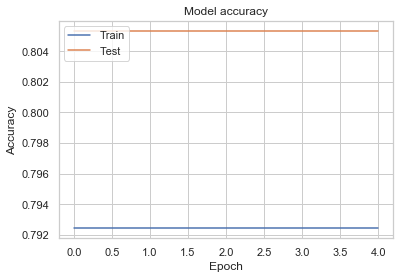

In [103]:
import matplotlib.pyplot as plt
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'], loc='upper left')
plt.show()

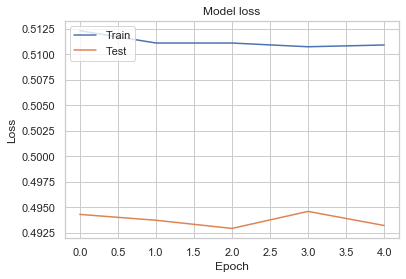

In [104]:
plt.plot(history.history['loss']) 
plt.plot(history.history['val_loss']) 
plt.title('Model loss') 
plt.ylabel('Loss') 
plt.xlabel('Epoch') 
plt.legend(['Train', 'Test'], loc='upper left') 
plt.show()